<a href="https://colab.research.google.com/github/songhyun7597/ITB2022/blob/main/%ED%86%B5%EC%8B%A0%EC%82%AC_%EC%9D%B4%ED%83%88_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EB%A5%98%EB%AA%A8%EB%8D%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##데이터 불러오기 및 전처리

In [2]:
!pip install mglearn 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 540 kB 21.2 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582637 sha256=74ae827367e2d36199ca9ba58348a17af39623f3476cda6566584a8e6e516f2a
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


In [3]:
!pip install --upgrade joblib==1.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 306 kB 19.3 MB/s 
  Attempting uninstall: joblib
    Found existing installation: joblib 1.2.0
    Uninstalling joblib-1.2.0:
      Successfully uninstalled joblib-1.2.0


In [5]:
import mglearn 

In [4]:
%matplotlib inline
import pandas as pd
import seaborn as sns      
import matplotlib.pyplot as plt
import numpy as np

In [27]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/IT와비즈니스혁신/ITB기말과제/WA_Fn-UseC_-Telco-Customer-Churn.csv")

customerID : 소비자의 식별자
gender : 성별
SeniorCitizen : 노인인지의 여부
Partner : 배우자의 유무
Dependents : 자녀의 유무
tenure : 고객의 가입 기간 (개월 수)
PhoneService : 휴대폰 서비스를 가입 했는지의 여부
MultipleLines : 여러 개의 통신선을 서비스 받고 있는지의 여부 (Yes, No, No phone service) / 휴대폰 서비스를 가입한 고객만 해당됨.
InternetService : 인터넷 서비스 제공자 (DSL, Fiber optic, No)
OnlineSecurity : 온라인 보안 서비스를 가입 했는지의 여부 (Yes, No, No internet service) / 인터넷 서비스를 가입한 고객만 해당됨.
OnlineBackup : 온라인 백업 서비스를 가입 했는지의 여부 (Yes, No, No internet service) / 인터넷 서비스를 가입한 고객만 해당됨.
DeviceProtection 기기 보호 서비스를 가입 했는지의 여부 (Yes, No, No internet service) / 인터넷 서비스를 가입한 고객만 해당됨.
TechSupport : 기술 서포트 서비스를 가입 했는지의 여부 (Yes, No, No internet service) / 인터넷 서비스를 가입한 고객만 해당됨.
StreamingTV : TV 스트리밍 서비스를 가입 했는지의 여부 (Yes, No, No internet service) / 인터넷 서비스를 가입한 고객만 해당됨.
StreamingMovies : 영화 스트리밍 서비스를 가입 했는지의 여부 (Yes, No, No internet service) / 인터넷 서비스를 가입한 고객만 해당됨.
Contract : 계약 유형 (Month-to-month, One year, Two year)
PaperlessBilling : 전자 고지서 여부
PaymentMethod : 요금 지불 방법 (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
MonthlyCharges : 매달 고객에게 청구되는 금액
TotalCharges : 고객에게 청구된 총 금액
Churn : 지난 한 달 내에 떠난 고객인지의 여부

In [ ]:
#데이터 전처리

In [7]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [28]:
#필요없는 칼럼 삭제
data = data.drop(["customerID"], axis=1)

In [29]:
#TotalCharges 실수형으로 변경
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'],errors='coerce')

In [30]:
data["SeniorCitizen"] = data["SeniorCitizen"].astype("object") 

In [31]:
#칼럼 별 변수 확인
def unique_col_values(df):
    for column in df:
        if df[column].dtypes=='object':
            print(f'{column}: {df[column].unique()}')

unique_col_values(data)

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


파트너와 자녀로 구분해서 나누기

가족단위로: 인구통계학적 원인/서비스

-싱글 (파트너/자녀 무)
-커플
-패밀리
-한부모

In [32]:
#Family 칼럼 추가하기()

Family = [
    (data['Partner'] == 'Yes') & (data['Dependents'] == 'Yes'),
    (data['Partner'] == 'Yes') & (data['Dependents'] == 'No'),
    (data['Partner'] == 'No') & (data['Dependents'] == 'Yes'),
    (data['Partner'] == 'No') & (data['Dependents'] == 'No')
]

vals = ['Family', 'Couple', 'Single parent', 'Single']

data['Family'] = np.select(Family, vals)

In [33]:
print(data["Family"].value_counts())

Single           3280
Family           1749
Couple           1653
Single parent     361
Name: Family, dtype: int64


In [65]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Family
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Couple
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,Single
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Single
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Single
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Single


In [ ]:
data.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2266.771362
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3794.737500
max,72.000000,118.750000,8684.800000


In [ ]:
print(data["Churn"].value_counts())
#2.7:1 비율

No     5174
Yes    1869
Name: Churn, dtype: int64


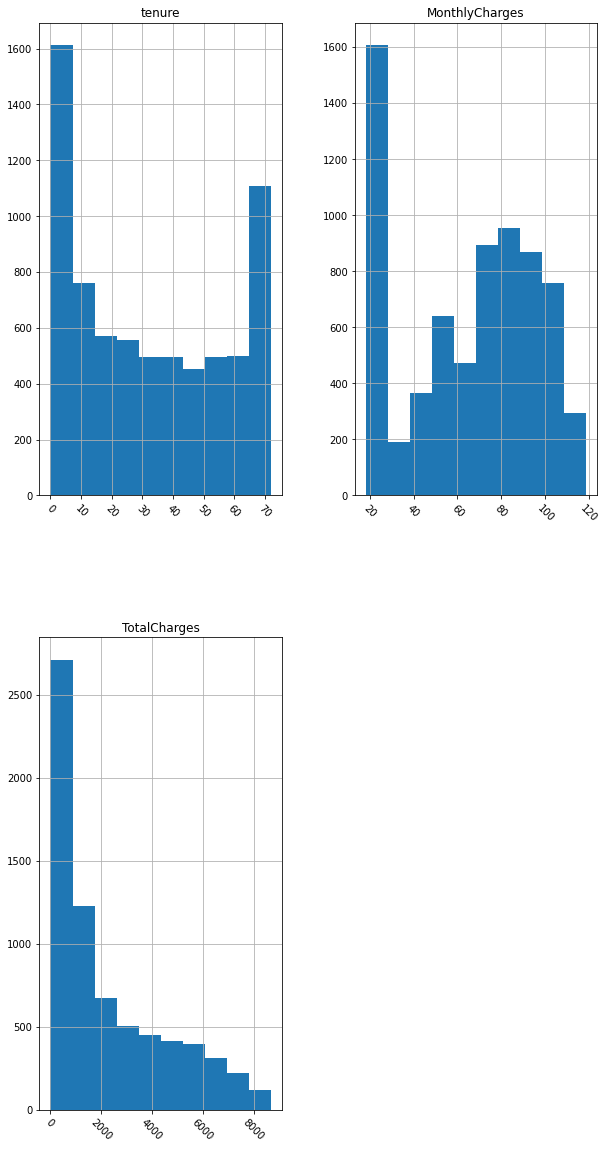

In [ ]:
data.hist(figsize=(10,20), xrot=-45)
plt.show()

##칼럼별 이탈률 확인

###gender
성별 간의 이탈률 차이는 없는 것으로 보임

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


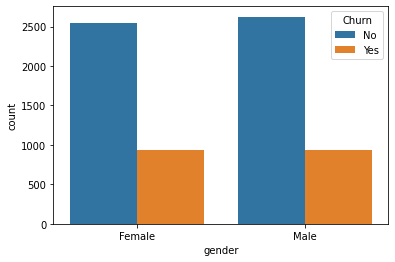

In [ ]:
sns.countplot("gender", data=data,hue="Churn")

###SeniorCitizen
노인일수록 이탈률이 높음

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


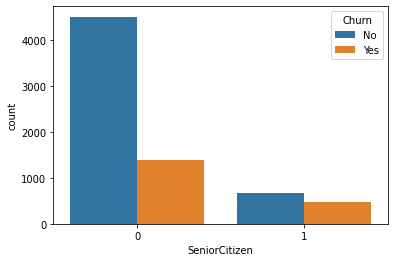

In [ ]:
sns.countplot("SeniorCitizen", data=data,hue="Churn")

###Partner/Dependents/Family
Partner가 있는 사람이 Partner가 없는 사람에 비해 이탈률이 낮음 -> Partner가 없을수록 이탈하는 경향이 있다.

Dependents가 있는 사람이 없는 사람에 비해 이탈률이 낮음 -> Dependents가 없을수록 이탈하는 경향이 있다.

Family(Partner有 / Defendents有)의 이탈률 비중이 제일 적고, Single(Partner無 / Defendents無)의 이탈률이 가장 높다. 

*통신사 결합 상품의 영향/가족결합혜택 때문이라 예상됨

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


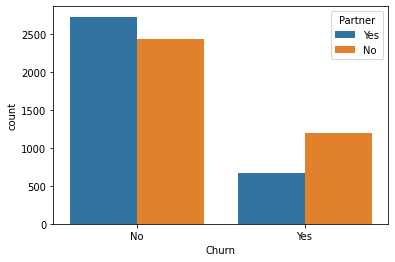

In [ ]:
sns.countplot("Churn", data=data,hue="Partner")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


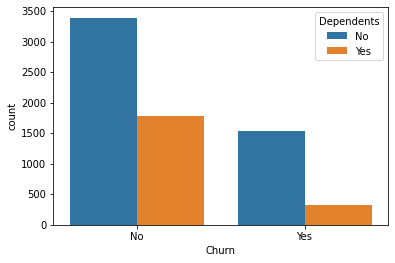

In [ ]:
sns.countplot("Churn", data=data,hue="Dependents")

Text(0.5, 1.0, 'Dependents feature')

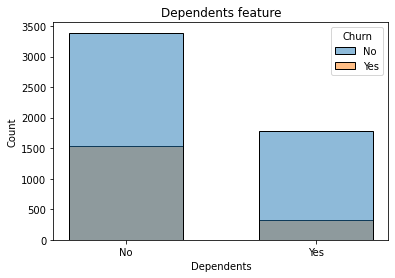

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(data=data,x="Dependents",hue='Churn', shrink=.6)
plt.title('Dependents feature')

In [ ]:
print(data["Family"].value_counts())

Single           3280
Family           1749
Couple           1653
Single parent     361
Name: Family, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


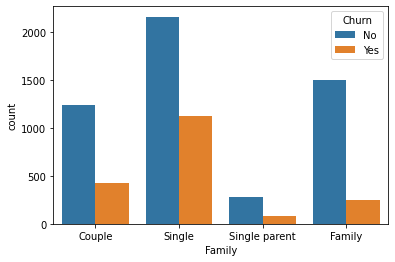

In [ ]:
sns.countplot("Family", data=data,hue="Churn")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


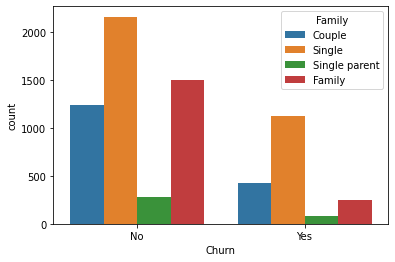

In [ ]:
sns.countplot("Churn", data=data,hue="Family")

Text(0.5, 1.0, 'Family feature')

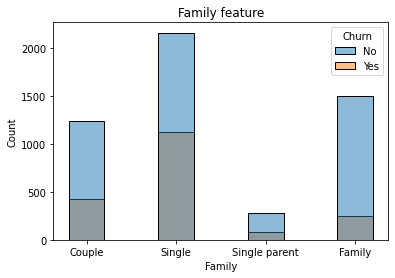

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(data=data,x="Family",hue='Churn', shrink=.4)
plt.title('Family feature')

###회사에서 제공하는 서비스
('PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity','OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies')

####PhoneService
PhoneService를 사용하는 고객이 사용하지 않는 고객보다 많다

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


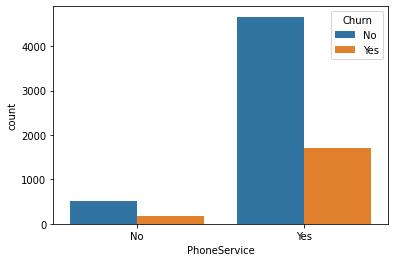

In [ ]:
sns.countplot("PhoneService", data=data,hue="Churn")

Text(0.5, 1.0, 'PhoneService feature')

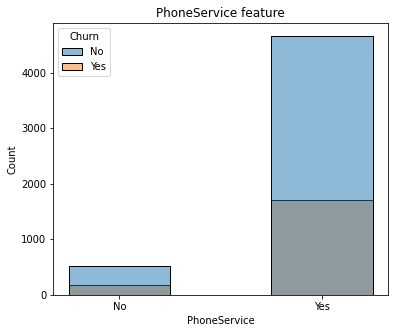

In [ ]:
plt.figure(figsize=(6,5))
sns.histplot(data=data,x="PhoneService",hue='Churn', shrink=.5)
plt.title('PhoneService feature')

####MultipleLines
MultipleLines를 이용하는 사람은 이용하지 않는 사람보다 이탈률이 높다.(통신선을 여러 곳에서 사용하다보니 이탈률이 높은 것으로 예상됨)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


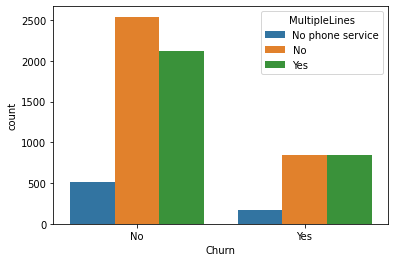

In [22]:
sns.countplot("Churn", data=data,hue="MultipleLines")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


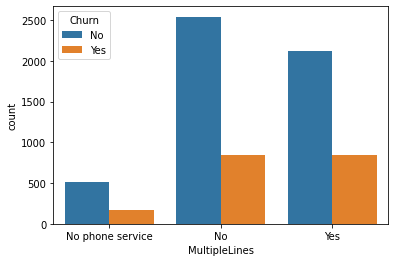

In [ ]:
sns.countplot("MultipleLines", data=data,hue="Churn")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


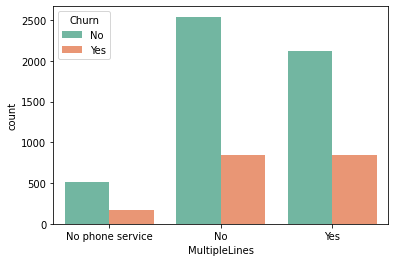

In [16]:
sns.countplot("MultipleLines", palette = 'Set2', data=data,hue="Churn")

####InternetService
 **Fiber optic를 이용하는 고객의 이탈률이 가장 높은 이탈률을 보이는 경향이 있다.
internet service를 이용하는 고객일수록 이탈할 가능성이 있다**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


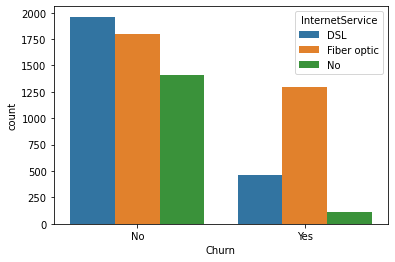

In [ ]:
sns.countplot("Churn", data=data,hue="InternetService")

####OnlineSecurity
OnlineSecurity를 이용하지 않는 고객일수록 이탈할 가능성이 높다

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


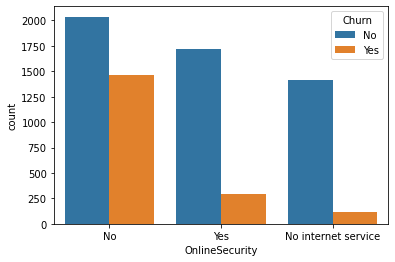

In [35]:
sns.countplot("OnlineSecurity", data=data,hue="Churn")

Text(0.5, 1.0, 'OnlineSecurity feature')

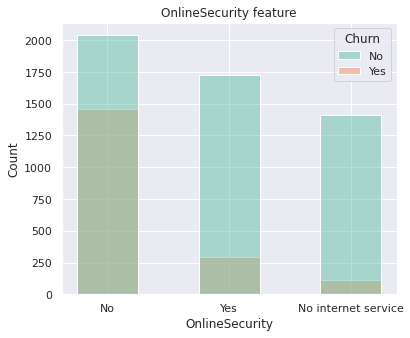

In [ ]:
plt.figure(figsize=(6,5))
sns.histplot(data=data,x="OnlineSecurity",palette = 'Set2', hue='Churn', shrink=.5)
plt.title('OnlineSecurity feature')

####OnlineBackup
OnlineBackup 서비스를 이용하지 않는 고객일수록 이탈할 가능성이 높다



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


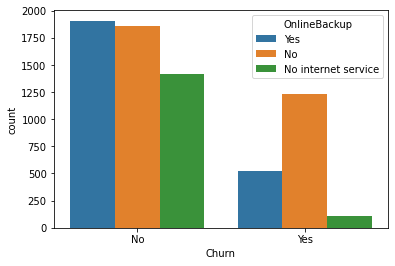

In [ ]:
sns.countplot("Churn", data=data,hue="OnlineBackup")

Text(0.5, 1.0, 'OnlineBackup feature')

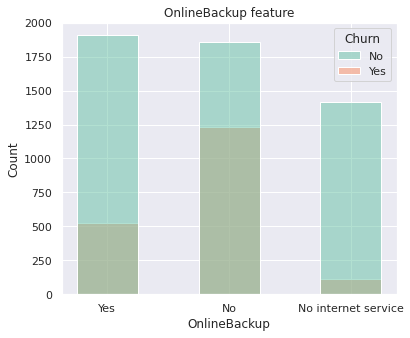

In [ ]:
plt.figure(figsize=(6,5))
sns.histplot(data=data,x="OnlineBackup",palette = 'Set2', hue='Churn', shrink=.5)
plt.title('OnlineBackup feature')

####DeviceProtection
DeviceProtection 서비스를 이용하지 않는 고객일수록 이탈할 가능성이 높다

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


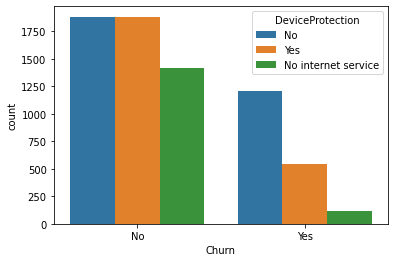

In [ ]:
sns.countplot("Churn", data=data,hue="DeviceProtection")

Text(0.5, 1.0, 'DeviceProtection feature')

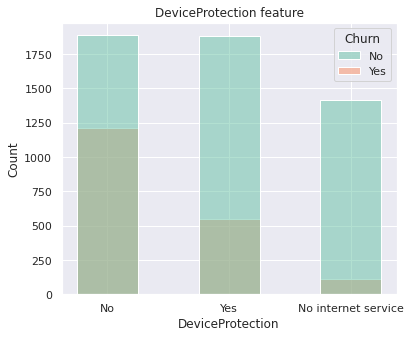

In [ ]:
plt.figure(figsize=(6,5))
sns.histplot(data=data,x="DeviceProtection",palette = 'Set2', hue='Churn', shrink=.5)
plt.title('DeviceProtection feature')

####TechSupport
TechSupport 서비스를 이용하지 않는 고객일수록 이탈 가능성이 높다


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


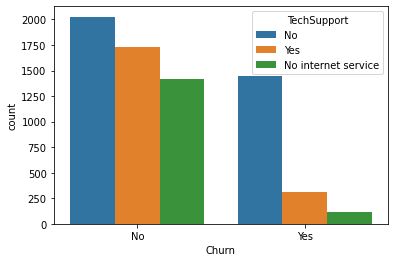

In [ ]:
sns.countplot("Churn", data=data,hue="TechSupport")

Text(0.5, 1.0, 'TechSupport feature')

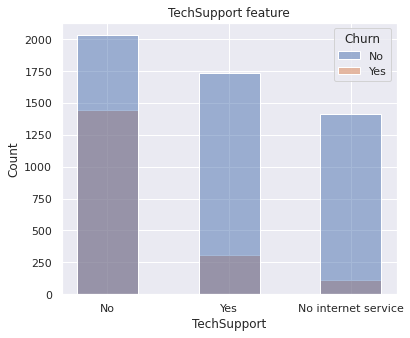

In [ ]:
plt.figure(figsize=(6,5))
sns.histplot(data=data,x="TechSupport",hue='Churn', shrink=.5)
plt.title('TechSupport feature')

**MultipleLines, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport 서비스는 이용하지 않는 고객일수록 이탈 가능성이 높다.**

####StreamingTV
StreamingTV를 사용하는 고객과 사용하지 않는 고객의 이탈률 차이가 크지 않음
=TV 스트리밍 서비스는 이탈률과 무관할 것임

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


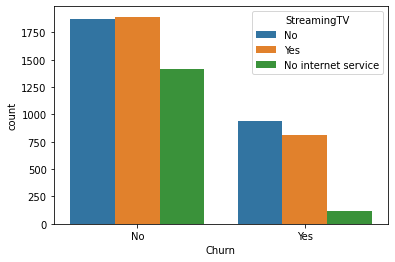

In [ ]:
sns.countplot("Churn", data=data,hue="StreamingTV")

Text(0.5, 1.0, 'StreamingTV feature')

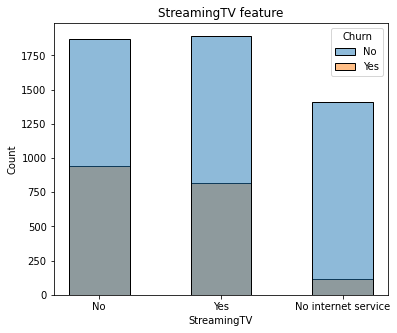

In [ ]:
plt.figure(figsize=(6,5))
sns.histplot(data=data,x="StreamingTV",hue='Churn', shrink=.5)
plt.title('StreamingTV feature')

####StreamingMovies
StreamingMovies를 사용하는 고객과 사용하지 않는 고객의 이탈률 차이가 크지 않음
=영화 스트리밍 서비스는 이탈률과 무관할 것임

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


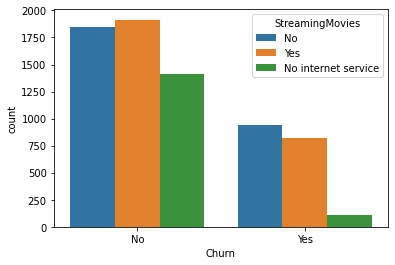

In [ ]:
sns.countplot("Churn", data=data,hue="StreamingMovies")

Text(0.5, 1.0, 'StreamingMovies feature')

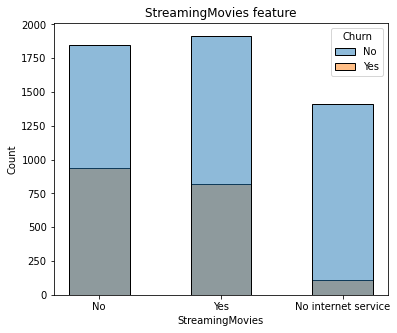

In [ ]:
plt.figure(figsize=(6,5))
sns.histplot(data=data,x="StreamingMovies",hue='Churn', shrink=.5)
plt.title('StreamingMovies feature')

###Contract*
**계약 유형 중 월별 주기로 결제하는 서비스의 이탈률이 가장 높다.
 계약(결제) 주기가 짧을수록 이탈 가능성이 높고, 계약 주기가 길수록 이탈률이 낮다.**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


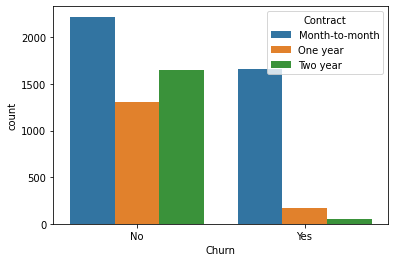

In [ ]:
sns.countplot("Churn", data=data,hue="Contract")

Text(0.5, 1.0, 'Contract feature')

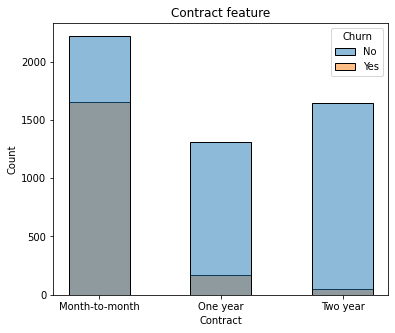

In [ ]:
plt.figure(figsize=(6,5))
sns.histplot(data=data,x="Contract",hue='Churn', shrink=.5)
plt.title('Contract feature')

###PaperlessBilling*
전자고지서를 사용하는 고객이 그렇지 않은 고객보다 이탈 가능성이 높다

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


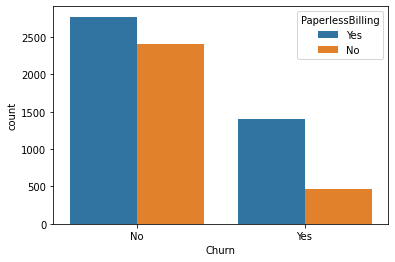

In [ ]:
sns.countplot("Churn", data=data,hue="PaperlessBilling")

Text(0.5, 1.0, 'PaperlessBilling feature')

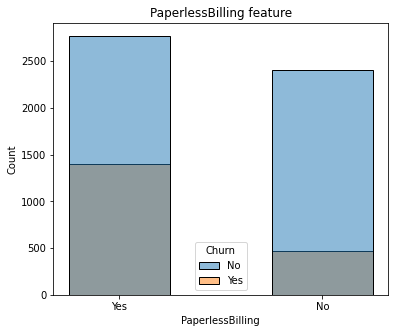

In [ ]:
plt.figure(figsize=(6,5))
sns.histplot(data=data,x="PaperlessBilling",hue='Churn', shrink=.5)
plt.title('PaperlessBilling feature')

###PaymentMethod*

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


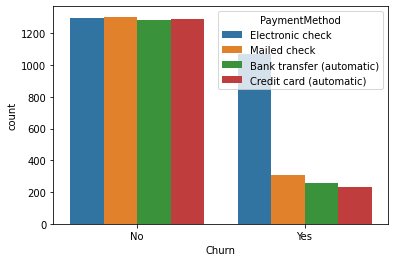

In [ ]:
sns.countplot("Churn", data=data,hue="PaymentMethod")

Text(0.5, 1.0, 'PaymentMethod feature')

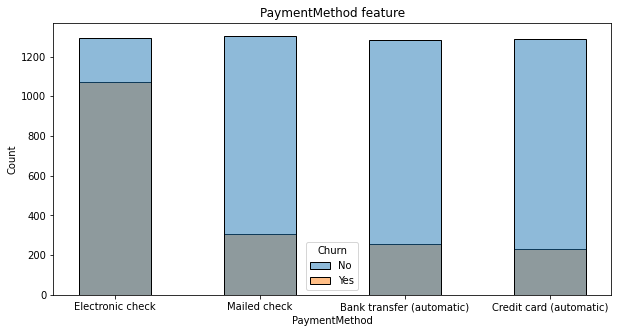

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(data=data,x="PaymentMethod",hue='Churn', shrink=.5)
plt.title('PaymentMethod feature')

**다른 유형에 비해 Electronic check를 이용하는 고객의 이탈률이 높다.**

In [ ]:
#https://www.kaggle.com/code/praxitelisk/telco-customer-churn-eda-ml

###Tenure
가입기간이 적을수록 이탈 확률이 높다

Text(0.5, 1.0, 'Tenure feature')

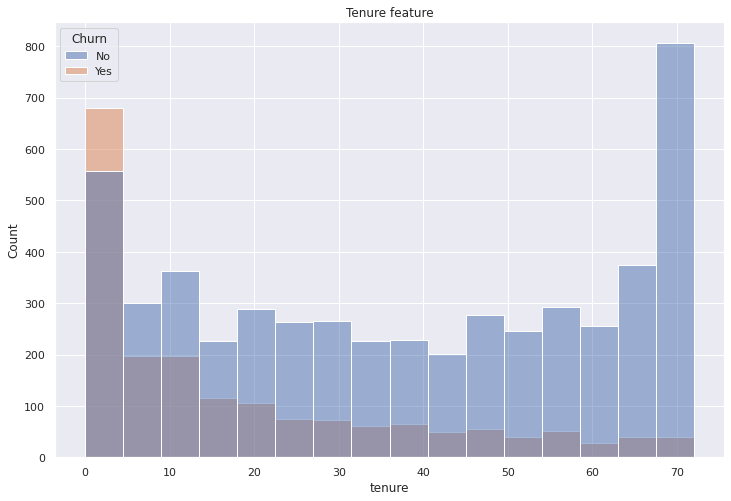

In [ ]:
plt.figure(figsize=(12,8))
sns.histplot(data=data,x="tenure",hue='Churn')
plt.title('Tenure feature')

###MonthlyCharges

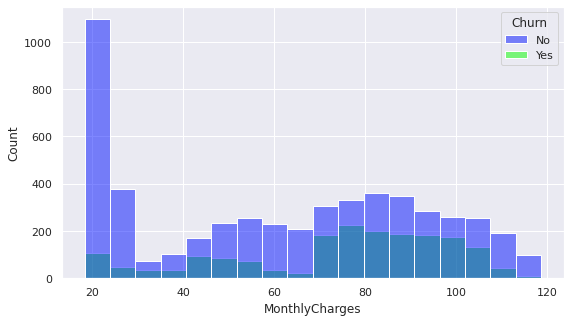

In [ ]:
plt.figure(figsize=(9,5))
sns.histplot(data=data,x="MonthlyCharges", palette='hsv_r',hue ="Churn")

###TotalCharges
TotalCharges가 높을수록 이탙률이 적다. -> 토탈비용이 높다는 것은 그만큼 오래 통신사를 이용했다는 것으로 이용 기간이 길수록 이탈률이 적다

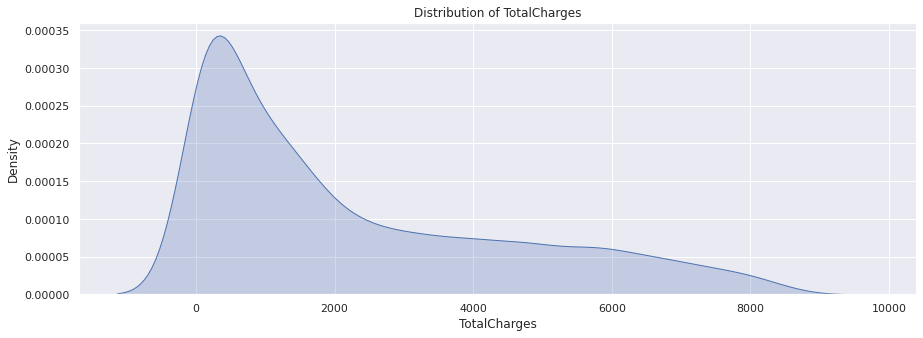

In [ ]:
plt.figure(figsize=(15, 5))
sns.kdeplot(x = data['TotalCharges'], shade=True)
plt.title('Distribution of TotalCharges')
plt.show()

Text(0.5, 1.0, 'TotalCharges feature')

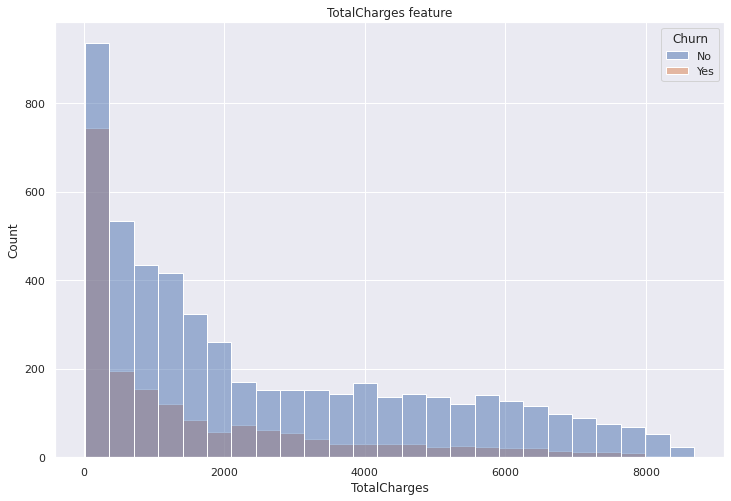

In [ ]:
plt.figure(figsize=(12,8))
sns.histplot(data=data,x="TotalCharges",hue='Churn')
plt.title('TotalCharges feature')

가족단위별 contract 비율

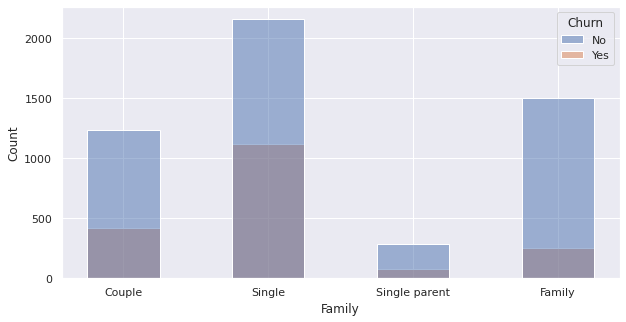

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(data=data, x="Family",hue='Churn', shrink=.5)


In [45]:
p1 = (data['Family'] == 'Couple') & (data['Churn'] == 'Yes')
p2 = (data['Family'] == 'Single') & (data['Churn'] == 'Yes')
p3 = (data['Family'] == 'Single parent') & (data['Churn'] == 'Yes')
p4 = (data['Family'] == 'Family') & (data['Churn'] == 'Yes')

In [46]:
churn_sum_by_Couple = data[data['Family'] == 'Couple'].groupby('Churn').tenure.count()
churn_sum_by_Single = data[data['Family'] == 'Single'].groupby('Churn').tenure.count()
churn_sum_by_Singleparent = data[data['Family'] == 'Single parent'].groupby('Churn').tenure.count()
churn_sum_by_Family = data[data['Family'] == 'Family'].groupby('Churn').tenure.count()

print("Couple")
print(churn_sum_by_Couple)
print("Single")
print(churn_sum_by_Single)
print("Single parent")
print(churn_sum_by_Singleparent)
print("Family")
print(churn_sum_by_Family)


Couple
Churn
No     1233
Yes     420
Name: tenure, dtype: int64
Single
Churn
No     2157
Yes    1123
Name: tenure, dtype: int64
Single parent
Churn
No     284
Yes     77
Name: tenure, dtype: int64
Family
Churn
No     1500
Yes     249
Name: tenure, dtype: int64


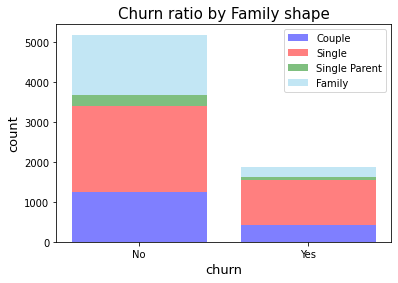

In [47]:
alpha = 0.5
grades_order = ['No','Yes']
p3 = plt.bar(grades_order, churn_sum_by_Couple, color='b', alpha=alpha)
p4 = plt.bar(grades_order, churn_sum_by_Single, color='r', alpha=alpha,
             bottom=churn_sum_by_Couple) # stacked bar chart
p5 = plt.bar(grades_order, churn_sum_by_Singleparent, color='g', alpha=alpha,
             bottom=churn_sum_by_Couple + churn_sum_by_Single) # stacked bar chart
p6 = plt.bar(grades_order, churn_sum_by_Family, color='skyblue', alpha=alpha,
             bottom=churn_sum_by_Couple + churn_sum_by_Single + churn_sum_by_Singleparent)

plt.title('Churn ratio by Family shape', fontsize=15)
plt.ylabel('count', fontsize=13)
plt.xlabel('churn', fontsize=13)
plt.legend((p3[0], p4[0], p5[0], p6[0]), ('Couple', 'Single', 'Single Parent', 'Family'), fontsize=10)
plt.show()

gender: ['Female' 'Male']

SeniorCitizen: [0 1]

Partner: ['Yes' 'No']

Dependents: ['No' 'Yes']

PhoneService: ['No' 'Yes']

MultipleLines: ['No phone service' 'No' 'Yes']

InternetService: ['DSL' 'Fiber optic' 'No']

OnlineSecurity: ['No' 'Yes' 'No internet service']

OnlineBackup: ['Yes' 'No' 'No internet service']

DeviceProtection: ['No' 'Yes' 'No internet service']

TechSupport: ['No' 'Yes' 'No internet service']

StreamingTV: ['No' 'Yes' 'No internet service']

StreamingMovies: ['No' 'Yes' 'No internet service']

Contract: ['Month-to-month' 'One year' 'Two year']

PaperlessBilling: ['Yes' 'No']

PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']

Churn: ['No' 'Yes']

Family: ['Couple' 'Single' 'Single parent' 'Family']

##모델 돌리기

In [34]:
X = data[['gender',	'SeniorCitizen',	'Partner',	'Dependents', 'Family',	'tenure',	'PhoneService',	'MultipleLines',	'InternetService',	'OnlineSecurity',	'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']]  
y = data[['Churn']]

In [35]:
X.head()

,gender,SeniorCitizen,Partner,Dependents,Family,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,Couple,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,Male,0,No,No,Single,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
2,Male,0,No,No,Single,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,Male,0,No,No,Single,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,Female,0,No,No,Single,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65


In [36]:
y.head()

,Churn
0,No
1,No
2,Yes
3,No
4,Yes


In [22]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   object 
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   Family            7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [37]:
#의사결정나무 모델을 돌리기 위해 수치형 데이터를 제거함
X_new = X.drop(['tenure', 'MonthlyCharges', 'TotalCharges'], axis=1)
print(X_new.columns)

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'Family',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object')


In [38]:
X_new.head()

,gender,SeniorCitizen,Partner,Dependents,Family,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,Female,0,Yes,No,Couple,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check
1,Male,0,No,No,Single,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check
2,Male,0,No,No,Single,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check
3,Male,0,No,No,Single,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic)
4,Female,0,No,No,Single,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check


In [39]:
X_dum=pd.get_dummies(X_new)

In [40]:
X_dum.head()
#one-hot encoding 결과 확인

,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,Family_Couple,Family_Family,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
1,0,1,1,0,1,0,1,0,0,0,...,0,0,1,0,1,0,0,0,0,1
2,0,1,1,0,1,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
3,0,1,1,0,1,0,1,0,0,0,...,0,0,1,0,1,0,1,0,0,0
4,1,0,1,0,1,0,1,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [42]:
X = X_dum

###의사결정나무

In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# 데이터셋을 train과 test 세트로 분할

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

tree = DecisionTreeClassifier(random_state=0)  
tree.fit(X_train, y_train)
print("학습용 데이터 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("시험용 데이터 정확도: {:.3f}".format(tree.score(X_test, y_test)))

학습용 데이터 정확도: 0.926
시험용 데이터 정확도: 0.712


In [44]:
#나무 깊이를 4로 제한
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print("학습용 데이터 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("시험용 데이터 정확도: {:.3f}".format(tree.score(X_test, y_test)))

학습용 데이터 정확도: 0.778
시험용 데이터 정확도: 0.777


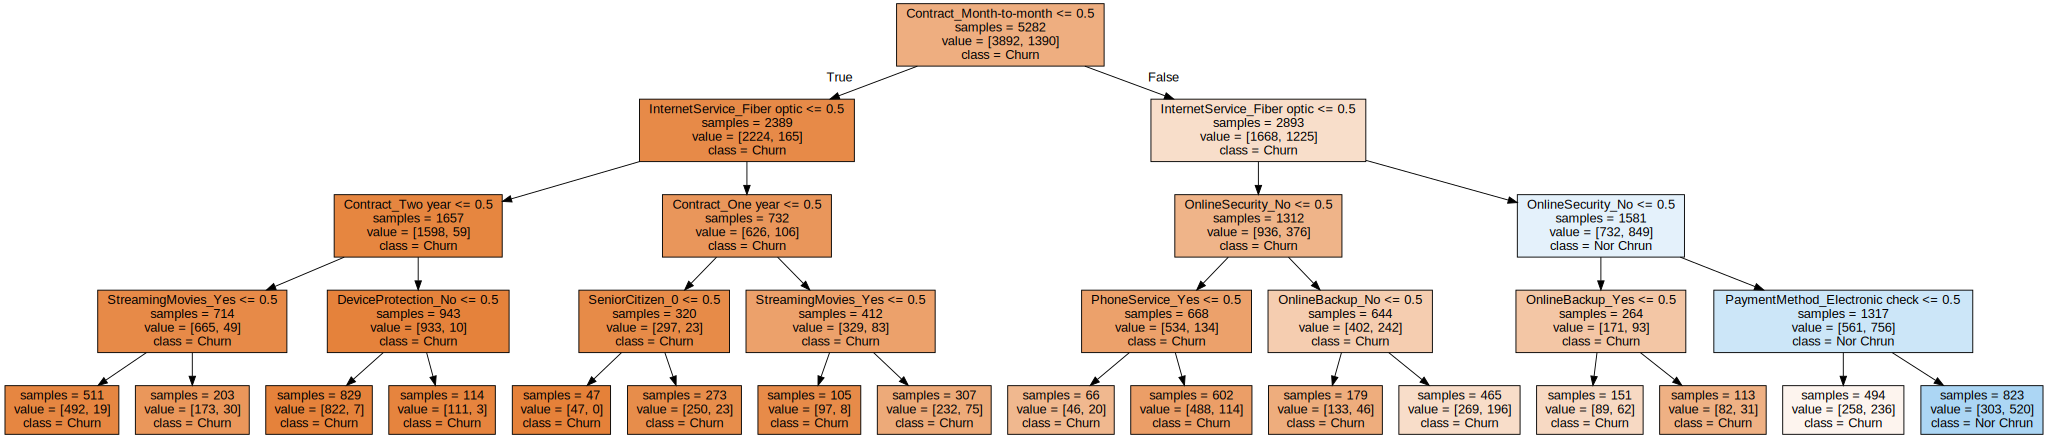

In [45]:
#graphviz 라이브러리를 이용하여 의사결정나무 그리기 
from sklearn.tree import export_graphviz
import graphviz

# filled = True: 색상의 진하기로 클래스를 나타냄, impurity: 불순도 계산값 보여주기 옵션
export_graphviz(tree, out_file="tree.dot", class_names=[ "Churn", "Nor Chrun"],
                feature_names=X_dum.columns[0:], impurity=False, filled=True)

with open("tree.dot") as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))

In [46]:
result = tree.feature_importances_
print("변수의 중요도:\n", result)

변수의 중요도:
 [0.00000000e+00 0.00000000e+00 1.10438487e-03 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 2.98174516e-03 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.97964985e-01 0.00000000e+00
 8.10112610e-02 0.00000000e+00 0.00000000e+00 1.35752658e-02
 0.00000000e+00 4.65657007e-03 1.24213206e-04 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.54764475e-02 6.37614190e-01 1.17354675e-02
 5.30844421e-03 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 2.84470257e-02 0.00000000e+00]


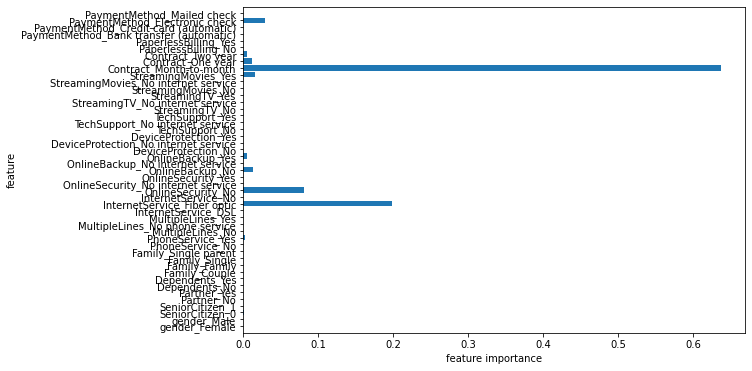

In [47]:
import numpy as np

def plot_feature_importances_Churn(model):
    plt.rcParams["figure.figsize"] = (9,6)
    n_features = len(X_dum.columns[0:]) 
    plt.barh(np.arange(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features),X_dum.columns[0:]) 
    plt.xlabel("feature importance")
    plt.ylabel("feature")
    plt.ylim(-1, n_features) #Y 축 범위 지정 (-1 ~ 30)

plot_feature_importances_Churn(tree)

In [48]:
res = pd.DataFrame(result) #데이터프레임 형식으로 만들기
res["name"] = X_dum.columns[0:]
display(res.info())

# perimeter_worst의 비중이 가장 큼, 루트 노드에서 이 값부터 사용 
display(res.sort_values(by='name'))   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       47 non-null     float64
 1   name    47 non-null     object 
dtypes: float64(1), object(1)
memory usage: 880.0+ bytes


None

,0,name
38,0.637614,Contract_Month-to-month
39,0.011735,Contract_One year
40,0.005308,Contract_Two year
6,0.000000,Dependents_No
7,0.000000,Dependents_Yes
26,0.000124,DeviceProtection_No
27,0.000000,DeviceProtection_No internet service
28,0.000000,DeviceProtection_Yes
8,0.000000,Family_Couple
9,0.000000,Family_Family



* EDA에서 시각화를 통해 본 내용과 비슷한 결과가 나옴
*[Contract_Month-to-month
], [InternetService_Fiber optic], [PaymentMethod_Electronic check]  : 이탈률이 높음
*   [OnlineSecurity] : 이탈률 낮음 


###랜덤포레스트

In [51]:
from sklearn.ensemble import RandomForestClassifier
# 변수를 모두 이용하여 100개의 나무 생성 (정확도가 높아짐)

forest = RandomForestClassifier(n_estimators=100, random_state=0) #100번 돌림
forest.fit(X_train, y_train)

print("학습용 데이터 세트 정확도: {:.3f}".format(forest.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(forest.score(X_test, y_test)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


학습용 데이터 세트 정확도: 0.926
시험용 데이터 세트 정확도: 0.759


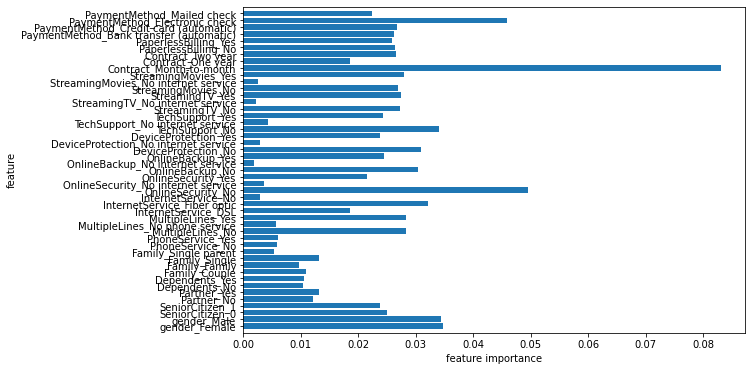

In [54]:
# 단일 의사결정나무의 경우보다 많은 변수(feature)들이 사용됨
plot_feature_importances_Churn(forest)

* 의사결정나무와 비슷한 결과
*[Contract_Month-to-month
], [InternetService_Fiber optic], [PaymentMethod_Electronic check] : 이탈률 높음
*[OnlineSecurity], [TechSupport] : 이탈률 낮음 

In [55]:
from sklearn.model_selection import cross_val_score

# 교차 검증을 10번 수행하여 10번의 교차 검증 평균 정확도를 비교 (10-fold cross validation)
# default cv=5

dt_scores = cross_val_score(tree, X_train, y_train, cv=10, scoring='accuracy')  
rf_scores = cross_val_score(forest, X_train, y_train, cv=10, scoring='accuracy')

print("Accuracy")
print("Decision tree: ", dt_scores) 
print("Random forest: ", rf_scores) 

print("Accuracy mean")
print("Decision tree :{:.3f}".format(dt_scores.mean())) 
print("Random forest :{:.3f}".format(rf_scores.mean())) 

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

Accuracy
Decision tree:  [0.78071834 0.79017013 0.7594697  0.80871212 0.76325758 0.79924242
 0.7405303  0.76704545 0.78030303 0.78030303]
Random forest:  [0.78827977 0.77504726 0.74242424 0.75189394 0.75189394 0.76893939
 0.75       0.75       0.75       0.76515152]
Accuracy mean
Decision tree :0.777
Random forest :0.759


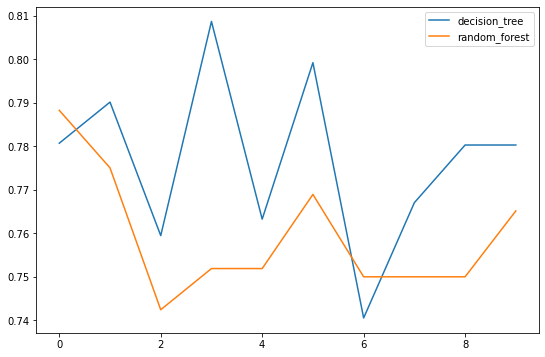

In [56]:
cv_list = [    
            ['decision_tree',dt_scores],
            ['random_forest',rf_scores],
          ]
df = pd.DataFrame.from_dict(dict(cv_list))
df.plot()

###그래디언트부스팅

In [57]:
from sklearn.ensemble import GradientBoostingClassifier
# 기본값은 max_depth= 3, n_estimators=100, learning_rate = 0.1

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(random_state=0)

In [58]:
print("학습용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

학습용 데이터 세트 정확도: 0.800
시험용 데이터 세트 정확도: 0.792


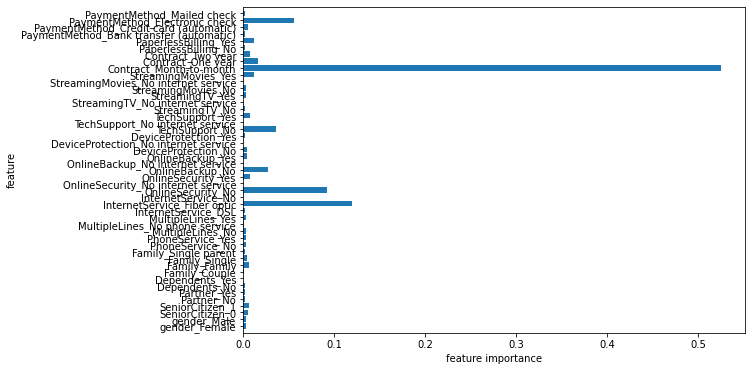

In [59]:
plot_feature_importances_Churn(gbrt)

In [60]:
#나무 깊이 제한
gbrt = GradientBoostingClassifier(random_state=0, max_depth=2)
gbrt.fit(X_train, y_train)

print("학습 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


학습 데이터 세트 정확도: 0.789
시험용 데이터 세트 정확도: 0.794



* 그래디언트 부스팅이 가장 정확도가 높음
*   정확도: 그래디언트부스팅(0.794) > 의사결정나무(0.777) > 랜덤포레스트(0.759)

